## START

In [265]:
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler

import re
import random
import os
import math

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [266]:
#  проверка на работу в "google colab" или "локально"

if 'sample_data' in os.listdir():
    project_dir = r'/content/drive/My Drive/Colab Notebooks/data/'
    print('Обнаружена среда выполнения Google Colab.')
    print('project_dir =>', project_dir)
else:
    project_dir = ''
    print('НЕ обнаружена среда выполнения Google Colab. Выбран режим локальной работы.')

Обнаружена среда выполнения Google Colab.
project_dir => /content/drive/My Drive/Colab Notebooks/data/


In [267]:
os.listdir(project_dir)

['u3',
 'ratings_1.txt',
 'ratings_2.txt',
 'ratings_3.txt',
 'ratings_4.txt',
 'ratings_5.txt',
 'ratings_6.txt',
 'ratings_7.txt',
 'ratings_8.txt',
 'ratings_9.txt',
 'ratings_10.txt',
 'StudentsPerformance.csv',
 'ds.txt',
 'tf_members.csv',
 'ratings.csv',
 'movies.csv',
 'ratings_example.txt',
 'movies_example.txt',
 'log.csv',
 'users.csv',
 'sample.csv',
 'tips.csv',
 'bit_desktop.csv',
 'tf_members2.csv',
 'redmine_tt_sample.csv',
 'RG-TimeManage - 07.2020.csv',
 'tf',
 'asp',
 'mt',
 '0-real_ds',
 'framingham.csv',
 'data_flats.csv']

In [268]:
y_happy = [4,20,110,15,23]
y_happy_pred = [5,15,100,9,21]

# Вычисляем MAE:
MAE = metrics.mean_absolute_error(y_happy, y_happy_pred)
print('MAE: ',MAE)

MAE:  4.8


In [269]:
#Вычисляем MSE:

MSE = metrics.mean_squared_error(y_happy, y_happy_pred)
print('MSE:', MSE)

MSE: 33.2


In [270]:
#Вычисляем коэффициент детерминации (истина VS предсказания):

R_2 = metrics.r2_score(y_happy, y_happy_pred)
print('R_2:',R_2)

R_2: 0.9774247946472284


In [271]:
# Task 3.3.1

metrics.mean_squared_error([2, 3, -1, 4], [1, 3, 2, 5])


2.75

In [272]:
#  Task 3.4.5

R_2 = metrics.r2_score([2, 3, -1, 4], [1, 3, 2, 5])
round(R_2, 2)

0.21

In [273]:
# 3A.5 Линейная регрессия. Предобработка

data = pd.read_csv(project_dir + 'data_flats.csv', sep =';')
data.head()


,id,full_sq,life_sq,floor,preschool_education_centers_raion,school_education_centers_raion,school_education_centers_top_20_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,mkad_km,bulvar_ring_km,kremlin_km,price_doc
0,1,43,27.0,4.0,5,5,0,0,7,3,0,16,1.131260,0.145700,0.177975,2.158587,0.600973,1.422391,13.675657,15.156211,5850000
1,2,34,19.0,3.0,5,8,0,0,6,1,1,3,0.635053,0.147754,0.273345,0.550690,0.065321,9.503405,8.132640,8.698054,6000000
2,3,43,29.0,2.0,4,7,0,0,5,1,0,0,1.445960,0.049102,0.158072,0.374848,0.453172,5.604800,8.054252,9.067885,5700000
3,4,89,50.0,9.0,9,10,0,0,17,6,0,11,0.963802,0.179441,0.236455,0.078090,0.106125,2.677824,18.309433,19.487005,13100000
4,5,77,77.0,4.0,7,9,0,2,25,2,0,10,0.688859,0.247901,0.376838,0.258289,0.236214,11.616653,0.787593,2.578671,16331452


In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   preschool_education_centers_raion      30469 non-null  int64  
 5   school_education_centers_raion         30469 non-null  int64  
 6   school_education_centers_top_20_raion  30469 non-null  int64  
 7   university_top_20_raion                30469 non-null  int64  
 8   sport_objects_raion                    30469 non-null  int64  
 9   additional_education_raion             30469 non-null  int64  
 10  culture_objects_top_25_raion           30469 non-null  int64  
 11  sh

In [275]:
data.isnull().sum()

id                                          0
full_sq                                     0
life_sq                                  6383
floor                                     167
preschool_education_centers_raion           0
school_education_centers_raion              0
school_education_centers_top_20_raion       0
university_top_20_raion                     0
sport_objects_raion                         0
additional_education_raion                  0
culture_objects_top_25_raion                0
shopping_centers_raion                      0
metro_km_walk                              25
kindergarten_km                             0
school_km                                   0
park_km                                     0
green_zone_km                               0
mkad_km                                     0
bulvar_ring_km                              0
kremlin_km                                  0
price_doc                                   0
dtype: int64

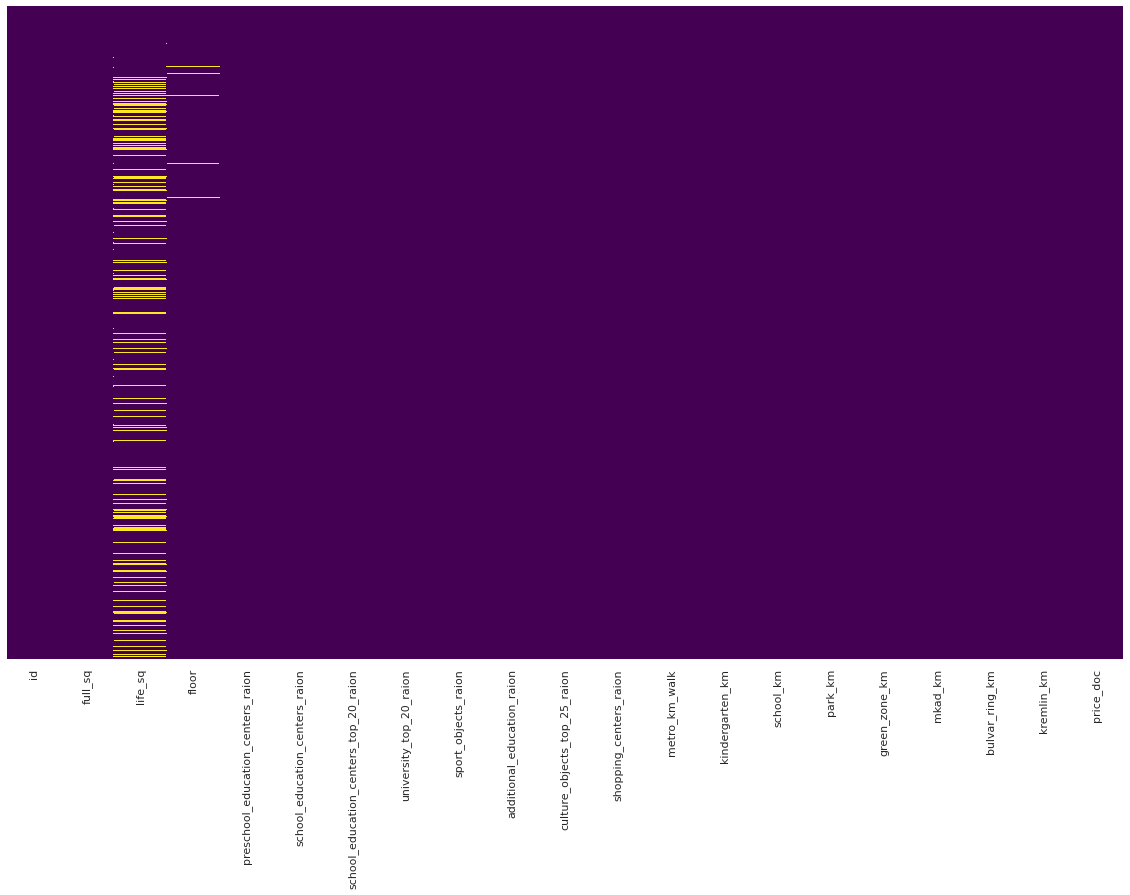

In [276]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

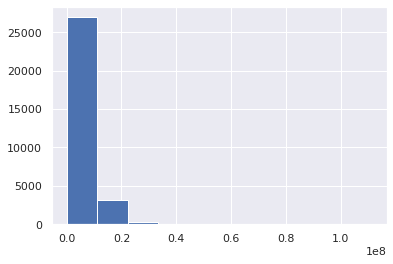

In [277]:
data.price_doc.hist()

In [278]:
data['price_doc'] = data['price_doc'].apply(lambda w: np.log(w + 1))


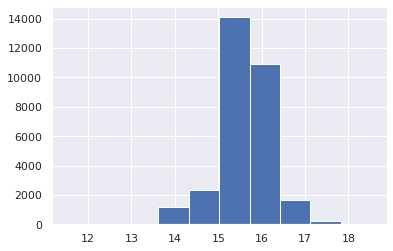

In [279]:
data.price_doc.hist()

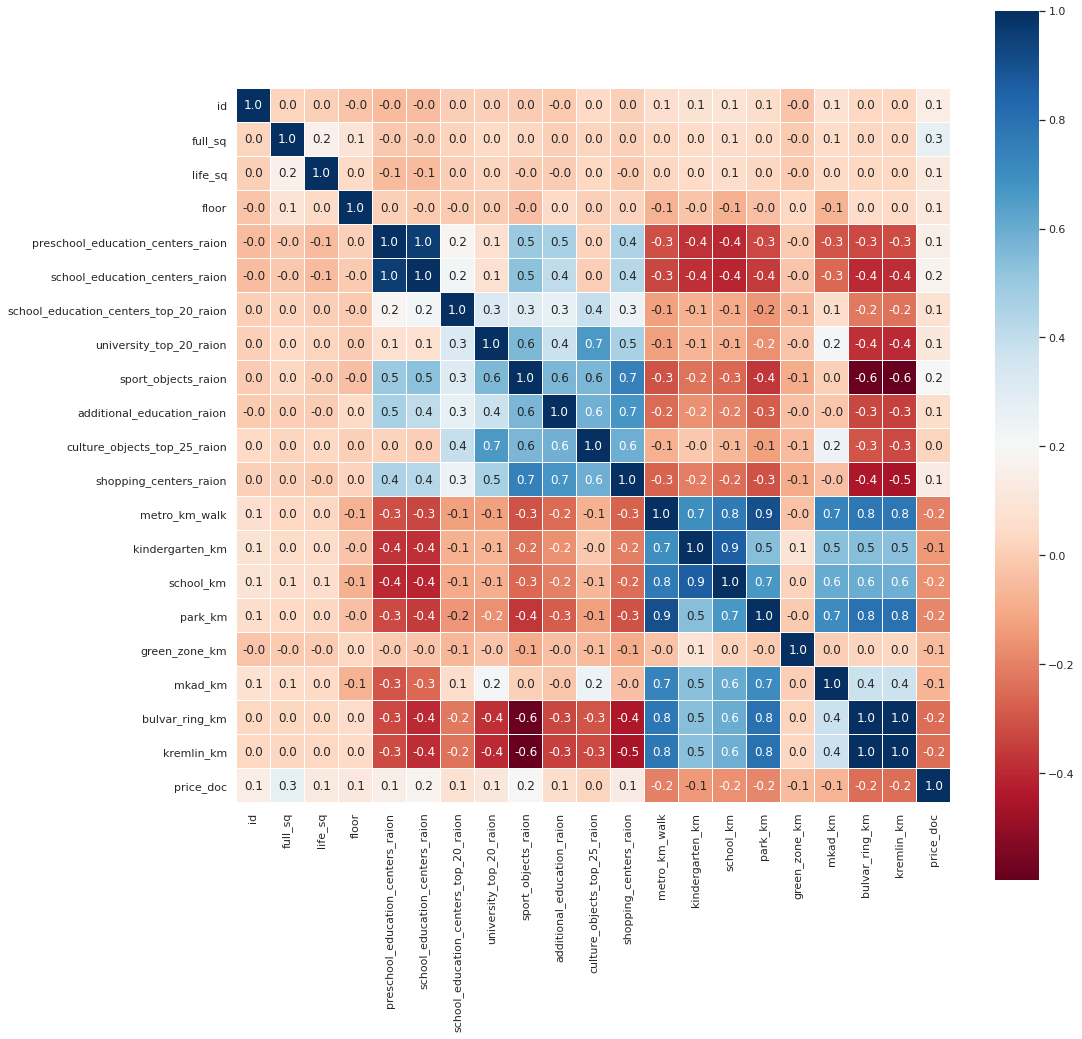

In [280]:
sns.set(font_scale=1)
plt.subplots(figsize=(16, 16))
sns.heatmap(data.corr(), square=True, annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")


## Model


In [281]:
df = data.copy()

In [282]:
df.columns

Index(['id', 'full_sq', 'life_sq', 'floor',
       'preschool_education_centers_raion', 'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'university_top_20_raion',
       'sport_objects_raion', 'additional_education_raion',
       'culture_objects_top_25_raion', 'shopping_centers_raion',
       'metro_km_walk', 'kindergarten_km', 'school_km', 'park_km',
       'green_zone_km', 'mkad_km', 'bulvar_ring_km', 'kremlin_km',
       'price_doc'],
      dtype='object')

* Удалите строки, где есть хотя бы один пропуск. 
* Обучите линейную регрессию, взяв тестовую выборку размера 0.2, random_state=77.
* Нормализуйте отобранные признаки для тестовой и для обучающей выборки отдельно(!) с помощью функции `RobustScaler()` (функция, которая подобна известным вам методам нормализации, однако использует медианы и квантили для вычисления, поэтому не чувствительна к выбросам и может приводить к лучшим результатам). 
* Вычислите MSE , ответ запишите с точностью до сотых. 
* Не забудьте, что id не несет никакой содержательной информации, поэтому не надо брать его в качестве предиктора! 
* Также не забудьте, что мы логарифмировали зависимую переменную, а значит при подсчете MSE необходимо найти экспоненциальную функцию от ! 
* Округлите ответ до целых.

In [283]:
df.dropna(inplace=True)
# df.isnull().sum()

In [284]:
# df.drop(['id', 'preschool_education_centers_raion', 'kindergarten_km', 'school_km', 'kremlin_km'], axis = 1, inplace=True)

In [285]:
df.shape

(23925, 21)

In [286]:
Y = df['price_doc'].values
# X = df.drop(['id', 'price_doc', 'preschool_education_centers_raion', 'kindergarten_km', 'school_km', 'kremlin_km'], axis=1)
X = df.drop(['id', 'price_doc', 'preschool_education_centers_raion', 'kindergarten_km', 'park_km', 'life_sq'], axis=1)
# X = df.drop(['id'], axis=1)
X.columns

Index(['full_sq', 'floor', 'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'university_top_20_raion',
       'sport_objects_raion', 'additional_education_raion',
       'culture_objects_top_25_raion', 'shopping_centers_raion',
       'metro_km_walk', 'school_km', 'green_zone_km', 'mkad_km',
       'bulvar_ring_km', 'kremlin_km'],
      dtype='object')

In [287]:
# len(Y), len(X)


In [288]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=77)

In [289]:
# Нормализуем обучающую и проверочную выборку по отдельности
scaler = RobustScaler()

X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)


In [290]:
# Обучаем модель на тестовом наборе данных
# model.fit(X_train, Y_train)
%%time

model = LinearRegression().fit(X_train_norm, Y_train)

CPU times: user 7.99 ms, sys: 7.94 ms, total: 15.9 ms
Wall time: 14.7 ms


In [291]:
# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
# y_pred = model.predict(X_test)

y_pred = model.predict(X_test_norm)

In [292]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются

# MAE = metrics.mean_absolute_error(np.exp(Y_test) - 1, np.exp(y_pred) - 1)

MSE = metrics.mean_squared_error(np.exp(Y_test) - 1, np.exp(y_pred) - 1)

# print('MAE:', round(MAE, 0))
print('MSE:', int(round(MSE, 0)))

MSE: 18975337270123


## END